In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sys.path.append('/users/mtaranov/LongRange3D/')
from models import RandomForest, SVC
from metrics import ClassificationResult
from utils import get_features, get_labels, subsample_data, normalize_features, reconstruct_2d, printMatrix, binarize, zscore, get_2D, plot_prediction, change_scale 

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX TITAN X (CNMeM is enabled with initial size: 2500 MB, cuDNN 5105)


In [2]:
contacts='PE'
path='/users/mtaranov/datasets_3d/dist_matched_'+contacts+'/'
X_train = get_features(path+'X_train_thres_10.npy')
y_train = get_labels(path+'y_train_thres_10.npy')
X_valid = get_features(path+'X_valid_thres_10.npy')
y_valid = get_labels(path+'y_valid_thres_10.npy')
X_test = get_features(path+'X_test_thres_10.npy')
y_test = get_labels(path+'y_test_thres_10.npy')

In [3]:
X_train_normalized, X_valid_normalized, X_test_normalized = normalize_features(X_train, X_valid, X_test)

In [4]:
X_train_pairs = X_train_normalized.reshape(X_train_normalized.shape[0],X_train_normalized.shape[2]*X_train_normalized.shape[3])
X_valid_pairs = X_valid_normalized.reshape(X_valid_normalized.shape[0],X_valid_normalized.shape[2]*X_valid_normalized.shape[3])
X_test_pairs = X_test_normalized.reshape(X_test_normalized.shape[0],X_test_normalized.shape[2]*X_test_normalized.shape[3])

# Random Forest

In [5]:
rf = RandomForest()

### with atac only

In [6]:
rf.train(X_train_pairs[:,:2], y_train)
preds_test = rf.predict(X_test_pairs[:,:2])
preds_train = rf.predict(X_train_pairs[:,:2])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

/users/mtaranov/LongRange3D/models.py:218: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.classifier.fit(X, y)


On Test:
Balanced Accuracy: 62.03%	 auROC: 0.670	 auPRC: 0.683	 auPRG: 0.329
Recall at 5%|10%|20% FDR: 4.7%|6.7%|19.3%	 Num Positives: 906	 Num Negatives: 906	 

On Train:
Balanced Accuracy: 96.43%	 auROC: 0.986	 auPRC: 0.989	 auPRG: 0.985
Recall at 5%|10%|20% FDR: 94.6%|95.3%|98.1%	 Num Positives: 2412	 Num Negatives: 2412	 



### with genomic locations

In [7]:
rf.train(X_train_pairs, y_train)
preds_test = rf.predict(X_test_pairs)
preds_train = rf.predict(X_train_pairs)
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 77.37%	 auROC: 0.870	 auPRC: 0.876	 auPRG: 0.770
Recall at 5%|10%|20% FDR: 29.6%|57.1%|77.0%	 Num Positives: 906	 Num Negatives: 906	 

On Train:
Balanced Accuracy: 100.00%	 auROC: 1.000	 auPRC: 1.000	 auPRG: 1.000
Recall at 5%|10%|20% FDR: 100.0%|100.0%|100.0%	 Num Positives: 2412	 Num Negatives: 2412	 



### with distance only

In [8]:
rf.train(X_train_pairs[:,20:], y_train)
preds = rf.predict(X_test_pairs[:,20:])

rf.train(X_train_pairs[:,20:], y_train)
preds_test = rf.predict(X_test_pairs[:,20:])
preds_train = rf.predict(X_train_pairs[:,20:])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 75.61%	 auROC: 0.836	 auPRC: 0.839	 auPRG: 0.700
Recall at 5%|10%|20% FDR: 18.2%|31.8%|70.4%	 Num Positives: 906	 Num Negatives: 906	 

On Train:
Balanced Accuracy: 99.98%	 auROC: 1.000	 auPRC: 1.000	 auPRG: 1.000
Recall at 5%|10%|20% FDR: 100.0%|100.0%|100.0%	 Num Positives: 2412	 Num Negatives: 2412	 



### w/o genomic locations

In [9]:
rf.train(X_train_pairs[:,:20], y_train)
preds_test = rf.predict(X_test_pairs[:,:20])
preds_train = rf.predict(X_train_pairs[:,:20])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 77.04%	 auROC: 0.861	 auPRC: 0.874	 auPRG: 0.755
Recall at 5%|10%|20% FDR: 38.3%|54.7%|74.1%	 Num Positives: 906	 Num Negatives: 906	 

On Train:
Balanced Accuracy: 99.63%	 auROC: 0.999	 auPRC: 0.999	 auPRG: 0.999
Recall at 5%|10%|20% FDR: 99.7%|99.7%|99.8%	 Num Positives: 2412	 Num Negatives: 2412	 



In [10]:
pred_probs_train = rf.predict(X_train_pairs[:,:20])
pred_probs_valid = rf.predict(X_valid_pairs[:,:20])
pred_probs_test = rf.predict(X_test_pairs[:,:20])

# Print prediction

In [11]:
indx_train = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_train_thres_10.npy')
indx_valid = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_valid_thres_10.npy')
indx_test = np.load ('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_test_thres_10.npy')

In [12]:
labels_all=(np.concatenate((y_train, y_valid, y_test), axis=0)).astype(int)
preds_all=(np.concatenate((pred_probs_train, pred_probs_valid, pred_probs_test), axis=0))
indx_all=np.concatenate((indx_train, indx_valid, indx_test), axis=0)

labels_chr1 = labels_all[np.ravel(np.where(indx_all[:,2]==1))]
preds_chr1 = preds_all[np.ravel(np.where(indx_all[:,2]==1))]
indx_chr1 = indx_all[np.ravel(np.where(indx_all[:,2]==1))]

In [13]:
NumberOfNodes=2272
preds_chr1_2d, labels_chr1_2d = get_2D(indx_chr1, preds_chr1, labels_chr1, NumberOfNodes)
# preds_test_2d, labels_test_2d = get_2D(indx_test, preds_test, labels_test, NumberOfNodes)

Some tests on adjacency matrix:
Some tests on adjacency matrix:


In [14]:
# printMatrix(preds_chr1_2d, '', 1, 1, title='preds')
# printMatrix(labels_chr1_2d, '', 1, 1, title='Captures')

1.0
(60, 60)
Limit: 1.0


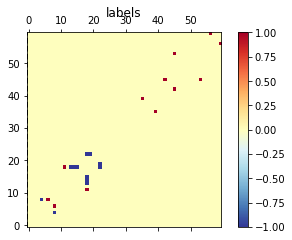

0.96
(60, 60)
Limit: 0.96


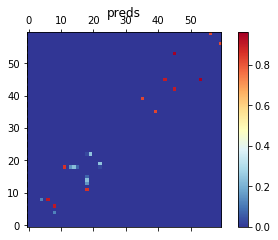

In [15]:
zoomIn_window = (400,460)
NumberOfNodes=2272
plot_prediction(change_scale(preds_chr1_2d)+change_scale(preds_chr1_2d).T, change_scale(labels_chr1_2d)+change_scale(labels_chr1_2d).T, zoomIn_window, )

# SVC

In [16]:
svc = SVC()
from sklearn.svm import SVC as scikit_SVC

# linear - SVM

In [17]:
svc.classifier= scikit_SVC(probability=True, kernel='linear')

### with atac only

In [18]:
svc.train(X_train_pairs[:,:2], y_train)
preds_test = svc.predict(X_test_pairs[:,:2])
preds_train = svc.predict(X_train_pairs[:,:2])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

/users/mtaranov/local/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


On Test:
Balanced Accuracy: 56.02%	 auROC: 0.619	 auPRC: 0.589	 auPRG: 0.254
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 906	 Num Negatives: 906	 

On Train:
Balanced Accuracy: 56.53%	 auROC: 0.636	 auPRC: 0.609	 auPRG: 0.264
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 2412	 Num Negatives: 2412	 



### with genomic locations

In [19]:
svc.train(X_train_pairs, y_train)
preds_test = svc.predict(X_test_pairs)
preds_train = svc.predict(X_train_pairs)
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 69.09%	 auROC: 0.764	 auPRC: 0.735	 auPRG: 0.549
Recall at 5%|10%|20% FDR: 0.6%|0.6%|27.9%	 Num Positives: 906	 Num Negatives: 906	 

On Train:
Balanced Accuracy: 68.66%	 auROC: 0.761	 auPRC: 0.733	 auPRG: 0.539
Recall at 5%|10%|20% FDR: 0.1%|0.1%|26.5%	 Num Positives: 2412	 Num Negatives: 2412	 



### with distance only

In [20]:
svc.train(X_train_pairs[:,20:], y_train)
preds_test = svc.predict(X_test_pairs[:,20:])
preds_train = svc.predict(X_train_pairs[:,20:])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 41.34%	 auROC: 0.498	 auPRC: 0.493	 auPRG: 0.005
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 906	 Num Negatives: 906	 

On Train:
Balanced Accuracy: 42.91%	 auROC: 0.521	 auPRC: 0.505	 auPRG: 0.040
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 2412	 Num Negatives: 2412	 



### w/o genomic locations

In [21]:
svc.train(X_train_pairs[:,:20], y_train)
preds_test = svc.predict(X_test_pairs[:,:20])
preds_train = svc.predict(X_train_pairs[:,:20])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 68.76%	 auROC: 0.763	 auPRC: 0.734	 auPRG: 0.546
Recall at 5%|10%|20% FDR: 0.8%|0.8%|10.8%	 Num Positives: 906	 Num Negatives: 906	 

On Train:
Balanced Accuracy: 68.88%	 auROC: 0.760	 auPRC: 0.734	 auPRG: 0.538
Recall at 5%|10%|20% FDR: 0.1%|1.7%|27.8%	 Num Positives: 2412	 Num Negatives: 2412	 



# RBF - SVM

In [22]:
svc.classifier= scikit_SVC(probability=True, kernel='rbf')

### with atac only

In [23]:
svc.train(X_train_pairs[:,:2], y_train)
preds_test = svc.predict(X_test_pairs[:,:2])
preds_train = svc.predict(X_train_pairs[:,:2])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 58.44%	 auROC: 0.625	 auPRC: 0.606	 auPRG: 0.237
Recall at 5%|10%|20% FDR: 0.1%|0.1%|0.1%	 Num Positives: 906	 Num Negatives: 906	 

On Train:
Balanced Accuracy: 59.99%	 auROC: 0.647	 auPRC: 0.631	 auPRG: 0.289
Recall at 5%|10%|20% FDR: 0.1%|0.1%|1.4%	 Num Positives: 2412	 Num Negatives: 2412	 



### with genomic locations

In [24]:
svc.train(X_train_pairs, y_train)
preds_test = svc.predict(X_test_pairs)
preds_train = svc.predict(X_train_pairs)
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 72.46%	 auROC: 0.790	 auPRC: 0.778	 auPRG: 0.600
Recall at 5%|10%|20% FDR: 1.2%|8.2%|48.6%	 Num Positives: 906	 Num Negatives: 906	 

On Train:
Balanced Accuracy: 77.20%	 auROC: 0.850	 auPRC: 0.849	 auPRG: 0.740
Recall at 5%|10%|20% FDR: 9.9%|54.4%|73.4%	 Num Positives: 2412	 Num Negatives: 2412	 



### with distance only

In [25]:
svc.train(X_train_pairs[:,20:], y_train)
preds_test = svc.predict(X_test_pairs[:,20:])
preds_train = svc.predict(X_train_pairs[:,20:])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 46.30%	 auROC: 0.515	 auPRC: 0.521	 auPRG: 0.008
Recall at 5%|10%|20% FDR: 0.1%|0.1%|0.1%	 Num Positives: 906	 Num Negatives: 906	 

On Train:
Balanced Accuracy: 49.32%	 auROC: 0.549	 auPRC: 0.541	 auPRG: 0.072
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 2412	 Num Negatives: 2412	 



### w/o genomic locations

In [26]:
svc.train(X_train_pairs[:,:20], y_train)
preds_test = svc.predict(X_test_pairs[:,:20])
preds_train = svc.predict(X_train_pairs[:,:20])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 72.41%	 auROC: 0.788	 auPRC: 0.774	 auPRG: 0.597
Recall at 5%|10%|20% FDR: 0.3%|8.2%|47.8%	 Num Positives: 906	 Num Negatives: 906	 

On Train:
Balanced Accuracy: 76.64%	 auROC: 0.844	 auPRC: 0.844	 auPRG: 0.725
Recall at 5%|10%|20% FDR: 13.7%|51.2%|72.4%	 Num Positives: 2412	 Num Negatives: 2412	 

